Note: through this exam you should only make use of numpy, matplotlib and pandas.

#Q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

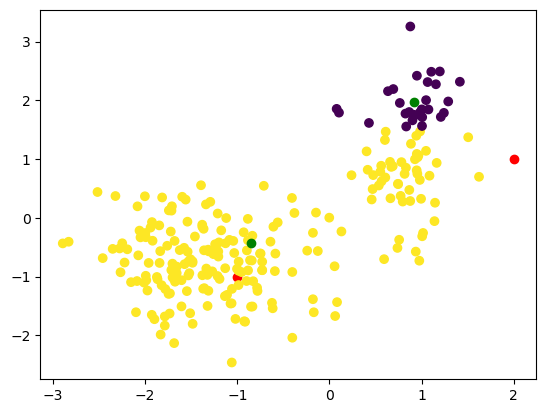

In [ ]:
#load in the data
df = pd.read_csv("d1.csv")
x1 = df['x1']
x2 = df['x2']

#Continue here...

# Testing

mean_1 = np.array([-1, -1])
mean_2 = np.array([2, 1])


x1_mean = np.array([mean_1[0], mean_2[0]])
x2_mean = np.array([mean_1[1], mean_2[1]])


plt.scatter(x1_mean, x2_mean, color="red")

def distance(x1, x2, target):
    return np.sqrt((x1-target[0])**2 + (x2-target[1])**2)

df["class"] = np.where(distance(x1, x2, x1_mean) < distance(x1, x2, x2_mean), 1, 2)

plt.scatter(x1, x2, c=df["class"])

c1_df = df[df["class"] == 1]
c2_df = df[df["class"] == 2]

new_mean_1 = np.array([c1_df["x1"].mean(), c1_df["x2"].mean()])
new_mean_2 = np.array([c2_df["x1"].mean(), c2_df["x2"].mean()])

new_x1_mean = np.array([new_mean_1[0], new_mean_2[0]])
new_x2_mean = np.array([new_mean_1[1], new_mean_2[1]])


plt.scatter(new_x1_mean, new_x2_mean, color="green")





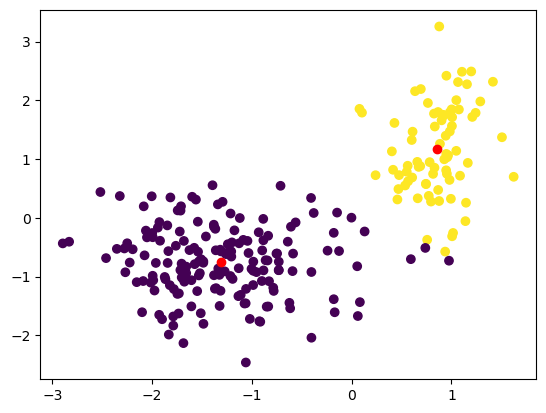

mean_1=array([-1.31247206, -0.75024239]), mean_2=array([0.85479773, 1.17420677])


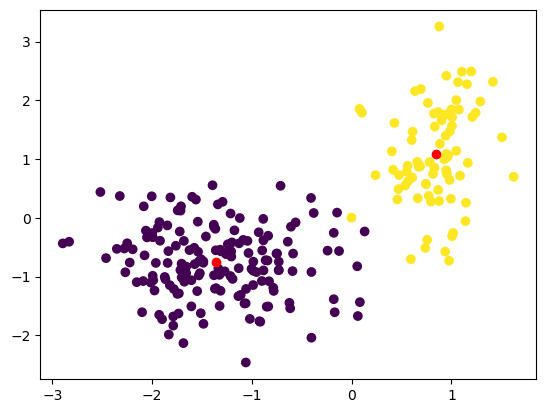

mean_1=array([-1.35717435, -0.75648152]), mean_2=array([0.8410398, 1.0921897])


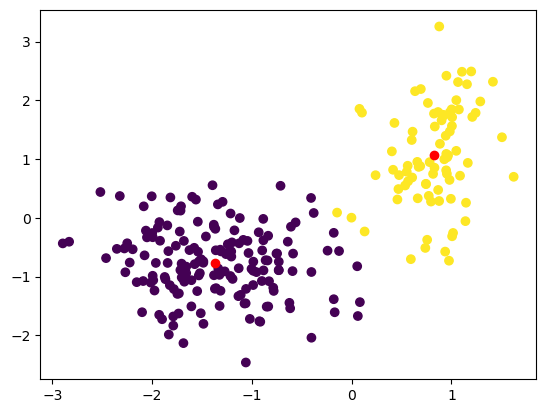

mean_1=array([-1.37333004, -0.7646729 ]), mean_2=array([0.82057682, 1.06412484])


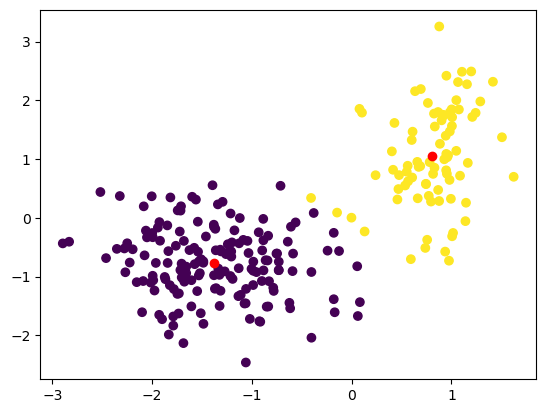

mean_1=array([-1.37915101, -0.77131269]), mean_2=array([0.80596223, 1.05547495])


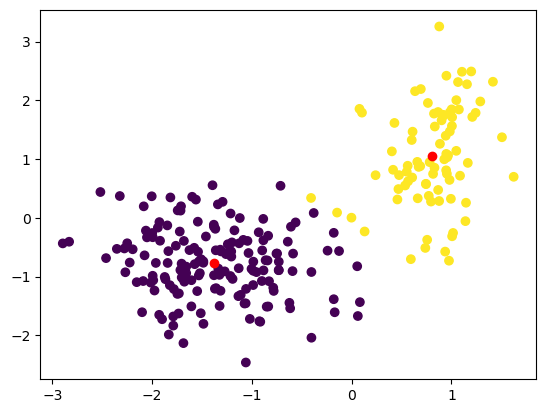

mean_1=array([-1.37915101, -0.77131269]), mean_2=array([0.80596223, 1.05547495])


In [26]:
# 1 answer
df = pd.read_csv("d1.csv")
x1 = df['x1']
x2 = df['x2']
mean_1 = np.array([-1, -1])
mean_2 = np.array([2, 1])

def distance(x1, x2, target):
    return np.sqrt((x1-target[0])**2 + (x2-target[1])**2)

for _ in range(5):
    df["class"] = np.where(distance(x1, x2, mean_1) < distance(x1, x2, mean_2), 1, 2)
    c1_df = df[df["class"] == 1]
    c2_df = df[df["class"] == 2]

    mean_1 = np.array([c1_df["x1"].mean(), c1_df["x2"].mean()])
    mean_2 = np.array([c2_df["x1"].mean(), c2_df["x2"].mean()])

    x1_mean = np.array([mean_1[0], mean_2[0]])
    x2_mean = np.array([mean_1[1], mean_2[1]])
    
    plt.scatter(x1, x2, c=df["class"], cmap="viridis")
    plt.scatter(x1_mean, x2_mean, color="red")
    plt.show()
    print(f"{mean_1=}, {mean_2=}")



#Q2

[-1.34920307 -0.75202036] 
 [[0.36348015 0.        ]
 [0.         0.35494227]] 

 [0.85157853 1.10581811] 
 [[0.07902776 0.        ]
 [0.         0.67727456]]


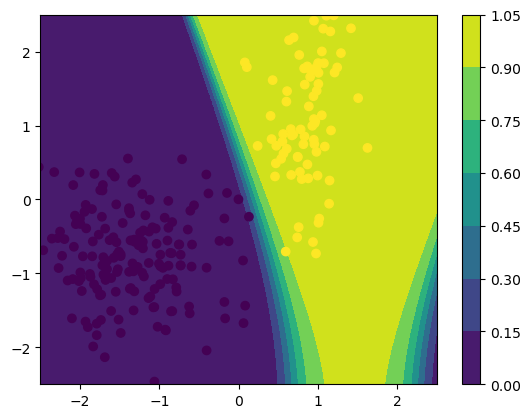

In [ ]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...

# Testing
# display(df)
# 2a answer
df1 = df[df["y"]==1]
df2 = df[df["y"]==2]

mean1 = np.array([df1["x1"].mean(), df1["x2"].mean()])
mean2 = np.array([df2["x1"].mean(), df2["x2"].mean()])

std1x1 = np.std(df1["x1"])
std1x2 = np.std(df1["x2"])
std2x1 = np.std(df2["x1"])
std2x2 = np.std(df2["x2"])

covar1 = np.array([[std1x1**2, 0], 
                  [0, std1x2**2]])
covar2 = np.array([[std2x1**2, 0], 
                  [0, std2x2**2]])

print(mean1, "\n", covar1, "\n\n", mean2, "\n", covar2)

# Testing
# 2b answer
grid, x1line, x2line = gen_sample_grid(200, 200, 2.5)

px_w1 = prob_density_2d(grid, mean1[0], mean1[1], covar1) # Likelihood of class 1 - probability distribution of an observation given its class
px_w2 = prob_density_2d(grid, mean2[0], mean2[1], covar2)

pw1 = len(df1["x1"]) / len(df["x1"]) # Prior of class 1 - probability of a class before an observation has occurred
pw2 = len(df2["x1"]) / len(df["x1"]) 

px = px_w1 * pw1 + px_w2 * pw2 # Evidence - scaling term

pw1_x = px_w1 * pw1 / px # Posterior of class 1 - probability of an observation belonging to a class after being observed
pw2_x = px_w2 * pw2 / px

pw2_x = pw2_x.reshape(200, 200)
# prediction = np.where(pw1_x > pw2_x, 1, 2).reshape(200, 200)
plt.clf()
plt.contourf(x1line, x2line, pw2_x)
plt.colorbar()
plt.scatter(x1, x2, c=clTrue)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()






#Q2 (c)

Answer here...
Since the covariance between the 2 classes is 0, the principle component directions for each class must be perpendicular to one another and aligned with the axes, i.e. one is along the x-axis and one is along the y-axis

#Q2 (d)

Answer here...
The prediction will be unreliable as the new datapoint is far away from the training data. It is also in an area where the prediction map seems to change without much reason backed by the current training data. Both of these points lead to the prediction not being reliable. The distribution extrapolates into an area of low probability.

#Q3

In [35]:
df = pd.read_csv("d3.csv")
x = df['x']
y = df['y']

display(df)

#Continue here...

,x,y
0,2.116863,12.742884
1,0.480189,5.110163
2,1.174486,5.543165
3,2.689072,10.867533
4,2.241070,12.101894
...,...,...
395,-0.913791,-1.893907
396,1.029509,4.432905
397,1.369322,6.636486
398,1.759894,11.153410


#Q4 (a)

In [ ]:
#Continue here... 
#or write out as a text field if you wish.

#Q4 (b)

Answer here...